# Scraping the r/soccer subreddit to understand the post history of 'Big 6' PL clubs in 2022

## Downloading the required data from r/soccer

### Importing the essential libraries

In [ ]:
import praw
from psaw import PushshiftAPI
import pandas as pd
import datetime
import os
import numpy as np
import matplotlib.pyplot as plt

### Using the Reddit app credentials to create a connection

In [ ]:
reddit = praw.Reddit(client_id = 'Afv7rdJdpRD3WdRHRvp1aA', client_secret = 'TboLbC6GJZ5ieMe2G4fCcip4d_gt1w', user_agent = 'Soccer Subreddit Web scraper by u/portgas_d_bass')
api = PushshiftAPI(reddit)

### Doing keyword search for the Big 6 PL clubs in r/soccer

In [ ]:
start_time = int(datetime.datetime(2022,1,1).timestamp())
end_time = int(datetime.datetime(2022,9,1).timestamp())
gen = api.search_submissions(q = 'Arsenal|Chelsea|Manchester|Liverpool|Tottenham', after = start_time, before = end_time,  subreddit = 'soccer')

### Creating a filepath and folder structure to store the data

In [ ]:
data_folder = './Scraped_Files_Reddit/'
file_name = 'Reddit_Soccer_Data_2022'

# Creating a file path if it doesn't already exist 
check_folder = os.path.isdir(data_folder)

if not check_folder:
    os.makedirs(data_folder)
    print('Created Folder: ', data_folder)

### Creating a pandas dataframe and loading the subreddit data into a csv file

In [ ]:
final_data = []
header_list = ['id', 'title', 'author', 'url', 'num_upvotes', 'num_comments', 'num_views', 'hour', 'day', 'month', 'year']

for submission in gen:
    dt_object = datetime.datetime.fromtimestamp(submission.created_utc)
    val = [submission.id, submission.title, submission.author, submission.url, submission.score, submission.num_comments, submission.view_count, dt_object.hour, dt_object.day, dt_object.month, dt_object.year]
    final_data.append(val)

df = pd.DataFrame(final_data)
df.to_csv(f'{data_folder}{file_name}.csv', encoding = 'UTF-8-sig', index = False, header = header_list)

### Final Code

In [2]:
import praw
from psaw import PushshiftAPI
import pandas as pd
import datetime
import os
import numpy as np
import matplotlib.pyplot as plt

reddit = praw.Reddit(client_id = 'Afv7rdJdpRD3WdRHRvp1aA', client_secret = 'TboLbC6GJZ5ieMe2G4fCcip4d_gt1w', user_agent = 'Soccer Subreddit Web scraper by u/portgas_d_bass')
api = PushshiftAPI(reddit)

start_time = int(datetime.datetime(2022,1,1).timestamp())
end_time = int(datetime.datetime(2022,9,1).timestamp())
gen = api.search_submissions(q = 'Arsenal|Chelsea|Manchester|Liverpool|Tottenham', after = start_time, before = end_time,  subreddit = 'soccer')

data_folder = './Scraped_Files_Reddit/'
file_name = 'Reddit_Soccer_Data_2022'

check_folder = os.path.isdir(data_folder)

if not check_folder:
    os.makedirs(data_folder)
    print('Created Folder: ', data_folder)

final_data = []
header_list = ['id', 'title', 'author', 'url', 'num_upvotes', 'num_comments', 'num_views', 'hour', 'day', 'month', 'year']

for submission in gen:
    dt_object = datetime.datetime.fromtimestamp(submission.created_utc)
    val = [submission.id, submission.title, submission.author, submission.url, submission.score, submission.num_comments, submission.view_count, dt_object.hour, dt_object.day, dt_object.month, dt_object.year]
    final_data.append(val)

df = pd.DataFrame(final_data)
df.columns = header_list
df.to_csv(f'{data_folder}{file_name}.csv', encoding = 'UTF-8-sig', index = False)


## Data Deep-dive using Pandas and Matplotlib  

### Prelim Checks

In [2]:
df.head()

,id,title,author,url,num_upvotes,num_comments,num_views,hour,day,month,year
0,x2qyx3,[Rik Elfrink] It seems very likely that PSV pr...,lacrimosa049,https://twitter.com/rikelfrink/status/15651056...,7,20,None,22,31,8,2022
1,x2ppdq,Why arent arsenal scoring as much as city??,None,None,0,29,None,21,31,8,2022
2,x2pmxw,[Fabrizio Romano] Bernardo Silva announces tha...,lacrimosa049,https://twitter.com/fabrizioromano/status/1565...,80,38,None,21,31,8,2022
3,x2pkan,[Nizaar Kinsella] Been told that Chelsea's you...,Laurkjl,https://twitter.com/NizaarKinsella/status/1565...,54,3,None,21,31,8,2022
4,x2p6l7,[Gianluca Di Marzio] Aubameyang to Chelsea and...,lacrimosa049,https://gianlucadimarzio.com/it/barcellona-che...,82,29,None,21,31,8,2022


In [3]:
print('Total number of records: ',len(df.index))
print('Column names are: ', df.columns.tolist())
print('Monthly post counts in 2022 are: \n', df.groupby('month')['id'].count())
print('Average number of upvotes are: ', df['num_upvotes'].mean())
print('Average number of comments are: ', df['num_comments'].mean())
print('Median number of upvotes are: ', df['num_upvotes'].median())
print('Median number of comments are: ', df['num_comments'].median())


Total number of records:  12875
Column names are:  ['id', 'title', 'author', 'url', 'num_upvotes', 'num_comments', 'num_views', 'hour', 'day', 'month', 'year']
Monthly post counts in 2022 are: 
 month
1    1914
2    1146
3    1452
4    1366
5    1951
6    1376
7    1704
8    1966
Name: id, dtype: int64
Average number of upvotes are:  420.13646601941747
Average number of comments are:  121.1913786407767
Median number of upvotes are:  10.0
Median number of comments are:  10.0


### Creating a flag for each record based on the PL club

In [4]:
df['title1'] = df['title'].str.lower()
pl_clubs = ['Arsenal', 'Chelsea', 'Manchester United', 'Manchester City', 'Liverpool', 'Tottenham Hotspur']

for club in pl_clubs:
    df[f'{club} Flag'] = np.where(df['title1'].str.count(club.lower()) > 0, 1, 0)

In [5]:
for club in pl_clubs:
    print(df.groupby(f'{club} Flag')['id'].count())

Arsenal Flag
0    10829
1     2046
Name: id, dtype: int64
Chelsea Flag
0    9747
1    3128
Name: id, dtype: int64
Manchester United Flag
0    10710
1     2165
Name: id, dtype: int64
Manchester City Flag
0    11657
1     1218
Name: id, dtype: int64
Liverpool Flag
0    10745
1     2130
Name: id, dtype: int64
Tottenham Hotspur Flag
0    12650
1      225
Name: id, dtype: int64


### Creating a date column 

In [18]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])

In [33]:
df.head()

,id,title,author,url,num_upvotes,num_comments,num_views,hour,day,month,year,title1,Arsenal Flag,Chelsea Flag,Manchester United Flag,Manchester City Flag,Liverpool Flag,Tottenham Hotspur Flag,date
0,x2qyx3,[Rik Elfrink] It seems very likely that PSV pr...,lacrimosa049,https://twitter.com/rikelfrink/status/15651056...,7,20,None,22,31,8,2022,[rik elfrink] it seems very likely that psv pr...,0,1,0,0,0,0,2022-08-31
1,x2ppdq,Why arent arsenal scoring as much as city??,None,None,0,29,None,21,31,8,2022,why arent arsenal scoring as much as city??,1,0,0,0,0,0,2022-08-31
2,x2pmxw,[Fabrizio Romano] Bernardo Silva announces tha...,lacrimosa049,https://twitter.com/fabrizioromano/status/1565...,80,38,None,21,31,8,2022,[fabrizio romano] bernardo silva announces tha...,0,0,0,1,0,0,2022-08-31
3,x2pkan,[Nizaar Kinsella] Been told that Chelsea's you...,Laurkjl,https://twitter.com/NizaarKinsella/status/1565...,54,3,None,21,31,8,2022,[nizaar kinsella] been told that chelsea's you...,0,1,0,0,0,0,2022-08-31
4,x2p6l7,[Gianluca Di Marzio] Aubameyang to Chelsea and...,lacrimosa049,https://gianlucadimarzio.com/it/barcellona-che...,82,29,None,21,31,8,2022,[gianluca di marzio] aubameyang to chelsea and...,0,1,0,0,0,0,2022-08-31


### Plotting the data using Matplotlib

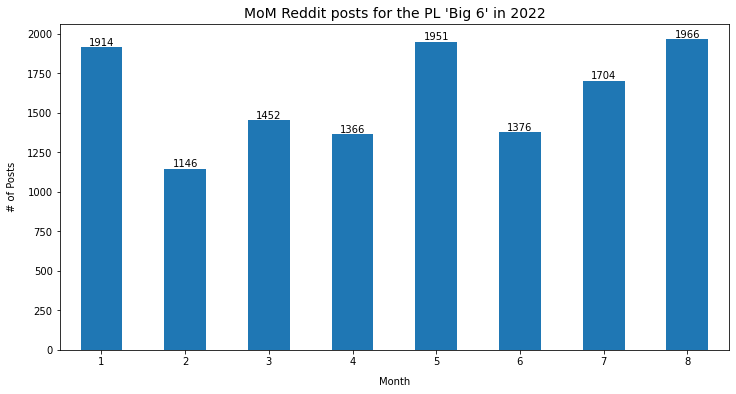

In [84]:
fig, ax = plt.subplots(figsize = (12,6))

data = df.groupby('month')['id'].count()
data.plot.bar()
ax.set_xticklabels(labels = [1,2,3,4,5,6,7,8], rotation = 0, size = 'medium')
ax.bar_label(ax.containers[0])
ax.set_xlabel('Month', rotation=0, labelpad=10)
ax.set_ylabel('# of Posts', rotation=90, labelpad=10)
plt.title("MoM Reddit posts for the PL 'Big 6' in 2022", fontsize=14)
plt.show()

The highest number of posts are understandably coming from the month of Aug'22 which is the final month of the summer transfer window, while you see peaks during May'22 and Jan'22. The peak at May'22 can be attributed to the end of the PL season while the Jan'22 number can be explained by the Winter transfer window. 

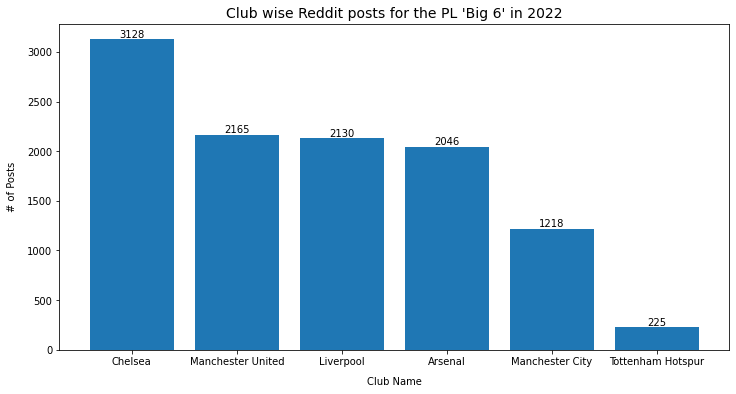

In [78]:
from collections import defaultdict

club_level_count = defaultdict(int)

for club in pl_clubs:
    club_level_count[club] = df[f'{club} Flag'].sum()

club_level_count = {k:v for k,v in sorted(club_level_count.items(), key = lambda a: a[1], reverse = True)} 

fig, ax = plt.subplots(figsize = (12,6))
bars = ax.bar(club_level_count.keys(), club_level_count.values())
ax.bar_label(bars)
ax.set_xlabel('Club Name', rotation=0, labelpad=10)
ax.set_ylabel('# of Posts', rotation=90, labelpad=10)
plt.title("Club wise Reddit posts for the PL 'Big 6' in 2022", fontsize=14)
plt.show()


We can clearly see that Chelsea had the most number of reddit posts in r/soccer in the time period we are considering while Tottenham had the least. Manchester United, Liverpool and Arsenal all have a similar post count while Manchester City is in the bottom 2. One thing to look at here would be the number of posts that were from the Summer transfer window to see how that impacted the overall post count as Chelsea and Manchester United both had a very busy transfer window compared to the other clubs (By busy, I mean the number of players that these two clubs were linked with was relatively higher than the other 4 clubs)

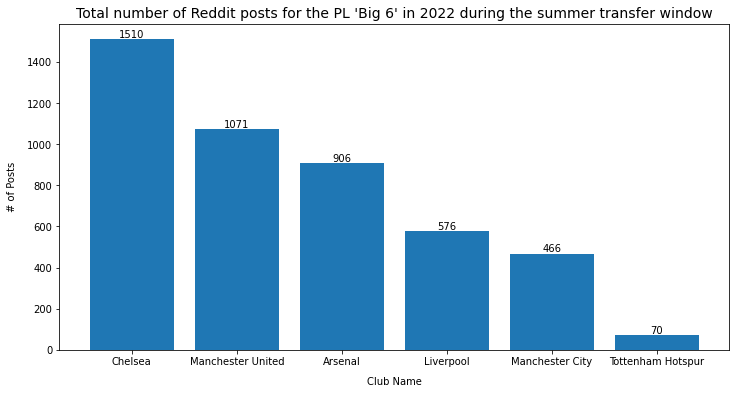

In [80]:
from collections import defaultdict

club_level_count_tw = defaultdict(int)

for club in pl_clubs:
    club_level_count_tw[club] = df[(df[f'{club} Flag'] == 1) & (df['date'] >= '2022-06-10') & (df['date'] <= '2022-08-31')]['id'].count()

club_level_count_tw = {k:v for k,v in sorted(club_level_count_tw.items(), key = lambda a: a[1], reverse = True)} 

fig, ax = plt.subplots(figsize = (12,6))
bars = ax.bar(club_level_count_tw.keys(), club_level_count_tw.values())
ax.bar_label(bars)
ax.set_xlabel('Club Name', rotation=0, labelpad=10)
ax.set_ylabel('# of Posts', rotation=90, labelpad=10)
plt.title("Total number of Reddit posts for the PL 'Big 6' in 2022 during the summer transfer window", fontsize=14)
plt.show()

As you can see, for Chelsea and Manchester United, ~50% of the posts came during the Summer transfer window 10 June - 31 August) which in turn has increased their overall post count and hence became a major factor in them being in the top 2. We could see a better illustration of this point in the chart below.

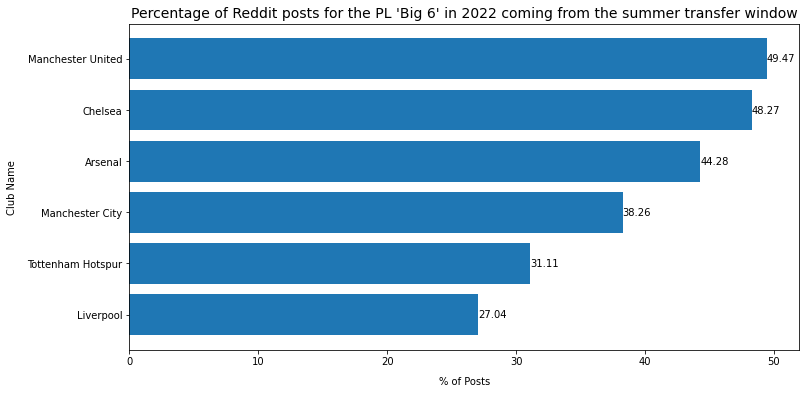

In [101]:
club_level_count_tw_perc = {}

for key,val in club_level_count_tw.items():
    club_level_count_tw_perc[key] = round((val*100)/club_level_count[key],2)

club_level_count_tw_perc = {k:v for k,v in sorted(club_level_count_tw_perc.items(), key = lambda a: a[1], reverse = False)} 

fig, ax = plt.subplots(figsize = (12,6))
pl_club = list(club_level_count_tw_perc.keys())
ax.barh(y = pl_club, width = club_level_count_tw_perc.values())
ax.bar_label(ax.containers[0])
ax.set_xlabel('% of Posts', rotation=0, labelpad=10)
ax.set_ylabel('Club Name', rotation=90, labelpad=10)
plt.title("Percentage of Reddit posts for the PL 'Big 6' in 2022 coming from the summer transfer window", fontsize=14)
plt.show()

As mentioned above, Manchester United and Chelsea have ~50% of their posts in 2022 coming during the summer transfer window, while Liverpool are at the bottom with only 27% of their posts coming from the transfer window. Although there were friendlies and the first few matches of the new season also being part of this period, posts related to them would be almost identical for all the clubs and hence the excess can be quite clearly attributed to the transfer activity for the respective clubs.

In [6]:
print(df['num_upvotes'].skew())
print(df['num_comments'].skew())

6.380583621375612
24.537835856376734


Since both the number of upvotes and comments are positively skewed, I am showing the median number of upvotes and comments for all the PL clubs in 2022 to better understand the level of interactions happening across clubs.

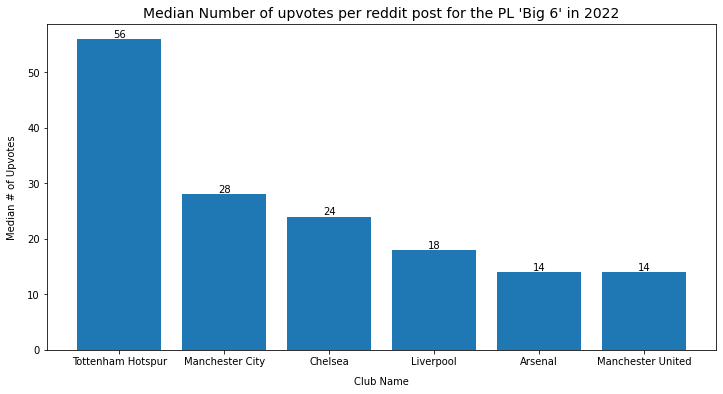

In [82]:
from collections import defaultdict

club_level_median_upvotes = defaultdict(int)

for club in pl_clubs:
    club_level_median_upvotes[club] = df[df[f'{club} Flag'] == 1]['num_upvotes'].median()

club_level_median_upvotes = {k:v for k,v in sorted(club_level_median_upvotes.items(), key = lambda a: a[1], reverse = True)} 

fig, ax = plt.subplots(figsize = (12,6))
bars = ax.bar(club_level_median_upvotes.keys(), club_level_median_upvotes.values())
ax.bar_label(bars)
ax.set_xlabel('Club Name', rotation=0, labelpad=10)
ax.set_ylabel('Median # of Upvotes', rotation=90, labelpad=10)
plt.title("Median Number of upvotes per reddit post for the PL 'Big 6' in 2022", fontsize=14)
plt.show()

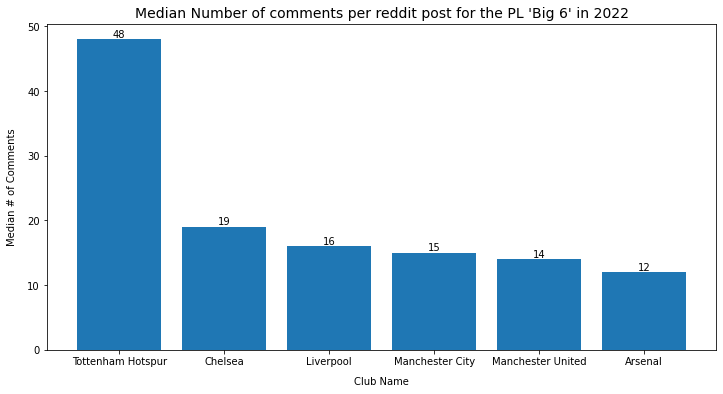

In [83]:
from collections import defaultdict

club_level_median_comments = defaultdict(int)
for club in pl_clubs:
    club_level_median_comments[club] = df[df[f'{club} Flag'] == 1]['num_comments'].median()

club_level_median_comments = {k:v for k,v in sorted(club_level_median_comments.items(), key = lambda a: a[1], reverse = True)} 

fig, ax = plt.subplots(figsize = (12,6))
bars = ax.bar(club_level_median_comments.keys(), club_level_median_comments.values())
ax.bar_label(bars)
ax.set_xlabel('Club Name', rotation=0, labelpad=10)
ax.set_ylabel('Median # of Comments', rotation=90, labelpad=10)
plt.title("Median Number of comments per reddit post for the PL 'Big 6' in 2022", fontsize=14)
plt.show()

Despite being in the bottom in terms of total number of posts, Tottenham has the highest median number of upvotes and comments per post in 2022, which signals decent number of interactions in most of the posts involving the club in r/soccer.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87c934d1-dc34-4bb7-b0c8-b6392ea4c946' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>